In [22]:
import xarray as xr
import hvplot.xarray
import numpy as np

In [2]:
ds_tsg = xr.open_dataset("../data/obs/ts_gridded_200404_2022215.nc")
ds_tsg = ds_tsg.rename({"depth": "z"})
ds_tsg = ds_tsg.assign_coords(z=-abs(ds_tsg.pressure))
ds_tsg = ds_tsg.set_coords(["pressure", ])
ds_tsg.z.attrs["units"] = "m"
ds_tsg.z.attrs["long_name"] = "vertical position"
ds_tsg

<xarray.Dataset> Size: 455MB
Dimensions:          (time: 13057, z: 242)
Coordinates:
  * time             (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    pressure         (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z                (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
Data variables: (12/18)
    TG_west          (z, time) float64 25MB ...
    SG_west          (z, time) float64 25MB ...
    TG_wb3           (z, time) float64 25MB ...
    SG_wb3           (z, time) float64 25MB ...
    TG_east          (z, time) float64 25MB ...
    SG_east          (z, time) float64 25MB ...
    ...               ...
    TG_east_flag     (z, time) float64 25MB ...
    SG_east_flag     (z, time) float64 25MB ...
    TG_marwest_flag  (z, time) float64 25MB ...
    SG_marwest_flag  (z, time) float64 25MB ...
    TG_mareast_flag  (z, time) float64 25MB ...
    SG_mareast_flag  (z, time) float64 25MB ...
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...

In [3]:
_TG = ds_tsg[["TG_west", "TG_wb3", "TG_marwest", "TG_mareast", "TG_east"]].to_array("pos")
_TG = _TG.assign_coords(pos=range(5))
_TG = _TG.assign_coords(name=(("pos", ), ["west", "wb3", "marwest", "mareast", "east"]))
_TG = _TG.assign_coords(lon=(("pos", ), [-76.74, -76.50, -50.57, -41.21, -16.23,]))
_TG = _TG.assign_coords(lat=(("pos", ), [26.52, 26.50, 24.52, 24.52, 26.99, ]))
_TG = _TG.rename("temperature")
_TG.attrs["long_name"] = "Temperature"
_TG.attrs["units"] = "degC"

_SG = ds_tsg[["SG_west", "SG_wb3", "SG_marwest", "SG_mareast", "SG_east"]].to_array("pos")
_SG = _SG.assign_coords(pos=range(5))
_SG = _SG.assign_coords(name=(("pos", ), ["west", "wb3", "marwest", "mareast", "east"]))
_SG = _SG.assign_coords(lon=(("pos", ), [-76.74, -76.50, -50.57, -41.21, -16.23,]))
_SG = _SG.assign_coords(lat=(("pos", ), [26.52, 26.50, 24.52, 24.52, 26.99, ]))
_SG = _SG.rename("salinity")
_SG.attrs["long_name"] = "Salinity"
_SG.attrs["units"] = "psu"

ds_pos = xr.merge([_TG, _SG])
ds_pos

<xarray.Dataset> Size: 253MB
Dimensions:      (time: 13057, z: 242, pos: 5)
Coordinates:
  * time         (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    pressure     (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z            (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
  * pos          (pos) int64 40B 0 1 2 3 4
    name         (pos) <U7 140B 'west' 'wb3' 'marwest' 'mareast' 'east'
    lon          (pos) float64 40B -76.74 -76.5 -50.57 -41.21 -16.23
    lat          (pos) float64 40B 26.52 26.5 24.52 24.52 26.99
Data variables:
    temperature  (pos, z, time) float64 126MB nan nan nan ... 2.405 2.405 2.405
    salinity     (pos, z, time) float64 126MB nan nan nan ... 34.89 34.89 34.89
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...
    long_name:                     Temperature
    units:                         degC

In [4]:
ds_model_groups = xr.open_dataset("../data/model/mooring_groups.nc")
ds_model_groups = ds_model_groups.rename({"western_mooring": "field"})
ds_model_groups

<xarray.Dataset> Size: 9MB
Dimensions:        (deptht: 46, mooring: 4, time_counter: 5844, variable: 2)
Coordinates:
  * deptht         (deptht) float32 184B 3.047 9.454 ... 5.625e+03 5.875e+03
    nav_lat        (mooring, deptht) float32 736B ...
    nav_lon        (mooring, deptht) float32 736B ...
    time_centered  (time_counter) datetime64[ns] 47kB ...
  * time_counter   (time_counter) datetime64[ns] 47kB 2004-01-01T12:00:00 ......
    x              (mooring, deptht) int64 1kB ...
    y              (mooring, deptht) int64 1kB ...
  * variable       (variable) <U4 32B 'temp' 'salt'
    moorings       (mooring, deptht) <U5 4kB ...
    i_moorings     (mooring, deptht) int64 1kB ...
  * mooring        (mooring) <U21 336B 'western_mooring' ... 'eastern_ridge_m...
Data variables:
    field          (mooring, variable, time_counter, deptht) float32 9MB ...

In [5]:
ds_model_pos = xr.Dataset(
    {
        "temperature": ds_model_groups.field.sel(variable="temp", drop=True).rename({
            "time_counter": "time",
            "deptht": "z",
            "mooring": "pos",
            "nav_lon": "lon",
            "nav_lat": "lat",
        }),
        "salinity": ds_model_groups.field.sel(variable="salt", drop=True).rename({
            "time_counter": "time",
            "deptht": "z",
            "mooring": "pos",
            "nav_lon": "lon",
            "nav_lat": "lat",
        }),
    },
)
ds_model_pos = ds_model_pos.assign_coords(z=-abs(ds_model_pos.z))
ds_model_pos = ds_model_pos.interp(
    z=ds_pos.z,
    method="slinear",
    kwargs={"fill_value": "extrapolate"},
)
ds_model_pos = ds_model_pos.drop_vars(["x", "y", "i_moorings", "moorings", "time_centered", "pos"])
ds_model_pos = ds_model_pos.assign_coords(
    name=(("pos", ), ['west', 'east', 'marwest', 'mareast']),
    pos=(("pos", ), ['west', 'east', 'marwest', 'mareast']),
)
ds_model_pos = ds_model_pos.assign_coords(
    lon=ds_model_pos.lon.mean("z"),
    lat=ds_model_pos.lat.mean("z"),
)
ds_model_pos = xr.merge([v.transpose(*ds_pos.dims) for k, v in ds_model_pos.data_vars.items()])
ds_model_pos

<xarray.Dataset> Size: 91MB
Dimensions:      (pos: 4, time: 5844, z: 242)
Coordinates:
    lat          (pos) float64 32B 26.55 26.56 24.51 24.52
    lon          (pos) float64 32B -76.69 -17.45 -49.8 -41.2
  * time         (time) datetime64[ns] 47kB 2004-01-01T12:00:00 ... 2019-12-3...
  * z            (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
    pressure     (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * pos          (pos) <U7 112B 'west' 'east' 'marwest' 'mareast'
    name         (pos) <U7 112B 'west' 'east' 'marwest' 'mareast'
Data variables:
    temperature  (time, z, pos) float64 45MB 24.31 19.13 24.47 ... 1.507 1.868
    salinity     (time, z, pos) float64 45MB 36.67 36.58 37.3 ... 34.85 34.88
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s) time_counter: mean

In [6]:
ds_pos = ds_pos.assign_coords(pos=ds_pos.name)
ds_pos

<xarray.Dataset> Size: 253MB
Dimensions:      (time: 13057, z: 242, pos: 5)
Coordinates:
  * time         (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    pressure     (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z            (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
    name         (pos) <U7 140B 'west' 'wb3' 'marwest' 'mareast' 'east'
    lon          (pos) float64 40B -76.74 -76.5 -50.57 -41.21 -16.23
    lat          (pos) float64 40B 26.52 26.5 24.52 24.52 26.99
  * pos          (pos) <U7 140B 'west' 'wb3' 'marwest' 'mareast' 'east'
Data variables:
    temperature  (pos, z, time) float64 126MB nan nan nan ... 2.405 2.405 2.405
    salinity     (pos, z, time) float64 126MB nan nan nan ... 34.89 34.89 34.89
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...
    long_name:                     Temperature
    units:                         degC

In [7]:
ds_pos_2 = (
    ds_model_pos.sel(time=ds_pos.time.values, method="nearest")
    .assign_coords(
        time=ds_pos.time.values,
        lon=ds_pos.lon,
        lat=ds_pos.lat,
    )
    .where(~ds_pos.temperature.isnull())
)
ds_pos_2 = ds_pos_2.sortby("lon")
ds_pos_2

<xarray.Dataset> Size: 202MB
Dimensions:      (time: 13057, z: 242, pos: 4)
Coordinates:
  * z            (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
  * pos          (pos) <U7 112B 'west' 'marwest' 'mareast' 'east'
  * time         (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    lat          (pos) float64 32B 26.52 24.52 24.52 26.99
    lon          (pos) float64 32B -76.74 -50.57 -41.21 -16.23
    pressure     (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
    name         (pos) <U7 112B 'west' 'marwest' 'mareast' 'east'
Data variables:
    temperature  (time, z, pos) float64 101MB nan nan nan nan ... nan nan 1.816
    salinity     (time, z, pos) float64 101MB nan nan nan nan ... nan nan 34.88
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s) time_counter: mean

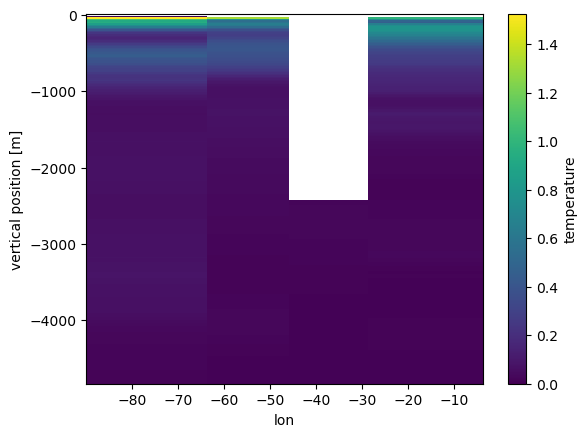

In [8]:
ds_pos_2.temperature.std("time").plot(x="lon", y="z")

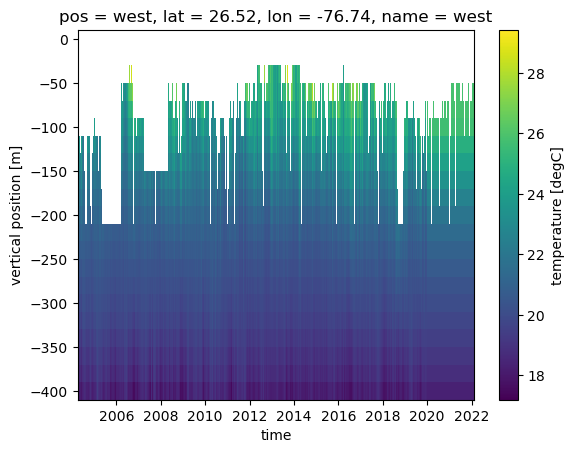

In [9]:
ds_pos_2.isel(pos=0).sel(z=slice(None, -400)).temperature.plot(x="time", y="z")

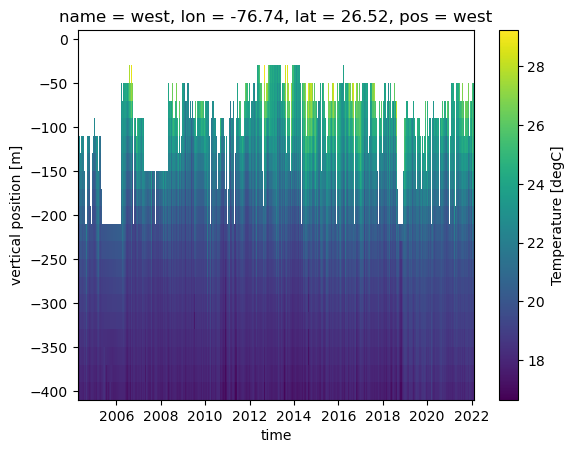

In [10]:
ds_pos.isel(pos=0).sel(z=slice(None, -400)).temperature.plot(x="time", y="z")

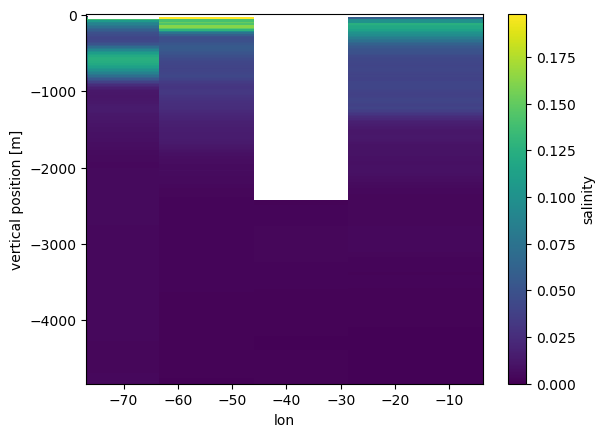

In [11]:
ds_pos.salinity.std("time").plot(x="lon", y="z")

In [12]:
import gsw

In [13]:
gsw.conversions.CT_from_pt?

Signature: gsw.conversions.CT_from_pt(SA, pt)
Docstring:
Calculates Conservative Temperature of seawater from potential
temperature (whose reference sea pressure is zero dbar).

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
pt : array-like
    Potential temperature referenced to a sea pressure, degrees C

Returns
-------
CT : array-like, deg C
    Conservative Temperature (ITS-90)
File:      ~/micromamba/envs/rapid_geostrophic/lib/python3.12/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

In [14]:
gsw.density.rho?

Signature: gsw.density.rho(SA, CT, p)
Docstring:
Calculates in-situ density from Absolute Salinity and Conservative
Temperature, using the computationally-efficient expression for
specific volume in terms of SA, CT and p  (Roquet et al., 2015).

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
CT : array-like
    Conservative Temperature (ITS-90), degrees C
p : array-like
    Sea pressure (absolute pressure minus 10.1325 dbar), dbar

Returns
-------
rho : array-like, kg/m
    in-situ density
File:      ~/micromamba/envs/rapid_geostrophic/lib/python3.12/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

In [15]:
ds_pos_2["ct"] = gsw.conversions.CT_from_pt(ds_pos_2.salinity, ds_pos_2.temperature)
ds_pos_2["ct"].attrs["long_name"] = "Conservative Temperature"
ds_pos_2["ct"].attrs["units"] = "degC"

ds_pos_2["rho"] = gsw.density.rho(ds_pos_2.salinity, ds_pos_2.ct, ds_pos_2.pressure)
ds_pos_2["rho"].attrs["long_name"] = "Density"
ds_pos_2["rho"].attrs["units"] = "kg/m3"

ds_pos_2

<xarray.Dataset> Size: 405MB
Dimensions:      (time: 13057, z: 242, pos: 4)
Coordinates:
  * z            (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
  * pos          (pos) <U7 112B 'west' 'marwest' 'mareast' 'east'
  * time         (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    lat          (pos) float64 32B 26.52 24.52 24.52 26.99
    lon          (pos) float64 32B -76.74 -50.57 -41.21 -16.23
    pressure     (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
    name         (pos) <U7 112B 'west' 'marwest' 'mareast' 'east'
Data variables:
    temperature  (time, z, pos) float64 101MB nan nan nan nan ... nan nan 1.816
    salinity     (time, z, pos) float64 101MB nan nan nan nan ... nan nan 34.88
    ct           (time, z, pos) float64 101MB nan nan nan nan ... nan nan 1.816
    rho          (time, z, pos) float64 101MB nan nan nan ... nan nan 1.049e+03
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s) time_counter: mean

# thermal wind

$$\frac{\partial v}{\partial z} = - \frac{g}{\rho_0\,f} \frac{\partial\rho}{\partial x}$$
$$V|_{X,Z} = \int_X{\rm d}x\int_Z{\rm d}z\int_Z{\rm d}z \frac{\partial v}{\partial z}$$
$$\int_X{\rm d}x = x_1 - x_0$$
$$\frac{\partial\rho}{\partial x} \approx \frac{\rho(x_1)-\rho(x_0)}{x_1 - x_0}$$
$$V|_{X,Z} = -\frac{g}{\rho_0\,f} \int_Z{\rm d}z\,  \int_Z{\rm d}z\, (\rho(x_1) - \rho(x_0))$$

In [16]:
g = 9.81
f = 2 * 7.292116E-5 * np.sin(np.deg2rad(26.5))
rho0 = 1025.0

In [17]:
rho_mean = ds_pos_2.rho.mean(["pos", "time"])
rho_std = ds_pos_2.rho.std(["pos", "time", "z"])
ds_pos_2["rho_standardized"] = (ds_pos_2.rho - rho_mean) / rho_std
ds_pos_2

<xarray.Dataset> Size: 506MB
Dimensions:           (time: 13057, z: 242, pos: 4)
Coordinates:
  * z                 (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
  * pos               (pos) <U7 112B 'west' 'marwest' 'mareast' 'east'
  * time              (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    lat               (pos) float64 32B 26.52 24.52 24.52 26.99
    lon               (pos) float64 32B -76.74 -50.57 -41.21 -16.23
    pressure          (z) float64 2kB 0.0 20.0 40.0 ... 4.8e+03 4.82e+03
    name              (pos) <U7 112B 'west' 'marwest' 'mareast' 'east'
Data variables:
    temperature       (time, z, pos) float64 101MB nan nan nan ... nan nan 1.816
    salinity          (time, z, pos) float64 101MB nan nan nan ... nan nan 34.88
    ct                (time, z, pos) float64 101MB nan nan nan ... nan nan 1.816
    rho               (time, z, pos) float64 101MB nan nan nan ... nan 1.049e+03
    rho_standardized  (time, z, pos) float64 101MB nan nan nan ... nan -0.001932
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s) time_counter: mean

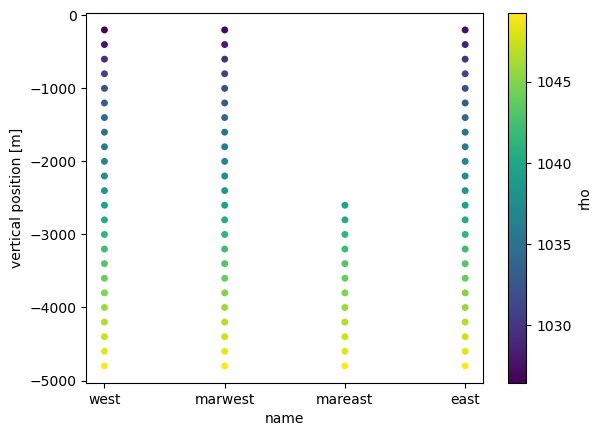

In [18]:
ds_pos_2.isel(z=slice(None, None, 10)).mean("time").plot.scatter(x="name", y="z", hue="rho")

In [19]:
def calc_t_umo(
    ds_pos=None,
    zref=-4800,
):

    pos_pairs_depth_range = [
        (("west", "east"), (None, -3700)),
        (("west", "marwest"), (-3700, None)),
        (("mareast", "east"), (-3700, None)),
    ]
    
    rho_diff = xr.concat(
        [
            (
                ds_pos.sel(pos=ds_pos.name == n1).squeeze(drop=True).sel(z=slice(z0, z1)).rho
                - ds_pos.sel(pos=ds_pos.name == n0).squeeze(drop=True).sel(z=slice(z0, z1)).rho
            ).assign_coords(box="_".join((n0, n1)))
            for ((n0, n1), (z0, z1)) in pos_pairs_depth_range
        ],
        dim="box"
    )
    rho_diff

    dv_dz = (- rho_diff * g / f / rho0).sum("box").where(
        (~(- rho_diff * g / f / rho0).isnull()).sum("box") > 0
    ).rename("dv_dz_times_X")

    # _dv_dz = dv_dz.isel(time=0, z=slice(-30, None))
    _dv_dz = dv_dz.isel(z=slice(-40, None))
    dv_dz_fillup = xr.where(
        ~dv_dz.isnull(),
        dv_dz,
        (_dv_dz.isel(z=0) + _dv_dz.diff("z").ffill("z").cumsum("z")).interp(z=dv_dz.z)
    )
    # dv_dz_fillup.sel(z=slice(-500, 0)).plot()


    
    transp_umo = (-(
        ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
        - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=zref, method="nearest")
    ).cumsum("z") * 20.0 / 1e6).sel(z=slice(None, -1300)).sel(z=-1000, method="nearest")
    
    return  transp_umo

In [20]:
t_umo_full = calc_t_umo(ds_pos_2)
ds_pos_2_std = ds_pos_2
ds_pos_2_std["rho"] = ds_pos_2.rho_standardized
t_umo_std = calc_t_umo(ds_pos_2_std)

In [25]:
(t_umo_full.resample(time="30D").mean().hvplot() * (t_umo_std * rho_std.data[()] + .5).resample(time="30D").mean().hvplot())

:Overlay
   .Curve.I  :Curve   [time]   (dv_dz_times_X)
   .Curve.II :Curve   [time]   (dv_dz_times_X)

In [ ]:
(~rho_diff.isnull()).plot(col="box", col_wrap=1)

In [ ]:
dv_dz = (- rho_diff * g / f / rho0).sum("box").where(
    (~(- rho_diff * g / f / rho0).isnull()).sum("box") > 0
).rename("dv_dz_times_X")
dv_dz

In [ ]:
_dv_dz = dv_dz.isel(time=0, z=slice(-30, None))
(_dv_dz.isel(z=0) + _dv_dz.diff("z").ffill("z").cumsum("z")).plot()
_dv_dz.plot()

In [ ]:
_dv_dz = dv_dz.isel(z=slice(-40, None))
dv_dz_fillup = xr.where(
    ~dv_dz.isnull(),
    dv_dz,
    (_dv_dz.isel(z=0) + _dv_dz.diff("z").ffill("z").cumsum("z")).interp(z=dv_dz.z)
)
dv_dz_fillup.sel(z=slice(-500, 0)).plot()

In [ ]:
zref = xr.DataArray(np.linspace(-5000, -4000, 4), dims=("zref", ))
zref = zref.assign_coords(zref=zref)
zref

In [ ]:
((
    ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
    - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=-4800, method="nearest")
).cumsum("z") * 20.0 / 1e6).resample(time="365D").mean().plot(x="time", y="z", vmin=0, vmax=40)

In [ ]:
import hvplot.xarray

In [ ]:
ds_transp = xr.open_dataset("../data/obs/moc_transports_200404_2022215.nc")
ds_transp

In [ ]:
(
    (-(
        ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
        - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=-4800, method="nearest")
    ).cumsum("z") * 20.0 / 1e6).resample(time="3D").mean().sel(z=slice(None, -1300)).min("z").hvplot(label="own")
    * ds_transp.t_umo10.resample(time="3D").mean().hvplot(label="rapid")
)

In [ ]:
(
    (-(
        ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
        - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=-4800, method="nearest")
    ).cumsum("z") * 20.0 / 1e6).resample(time="1D").mean().sel(z=slice(None, -1300)).min("z")
    - ds_transp.t_umo10.resample(time="1D").mean()
).rename("diff").to_pandas().describe()

In [ ]:
ds_transp = xr.open_dataset("../data/obs/moc_transports_200404_2022215.nc")
ds_transp

In [ ]:
((
    ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).median("time")
    - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).median("time").sel(z=zref, method="nearest")
).cumsum("z") * 20.0 / 1e6).to_pandas().plot()

In [ ]:
import hvplot.xarray

In [ ]:
dv_dz.where(
    dv_dz.z.where(~dv_dz.isnull()).max("z") < - 200
).sel(z=slice(-1000, None)).to_pandas().plot(color="k", alpha=0.01, legend=False);

In [ ]:
xr.DataArray([0, 1, np.nan]) - xr.DataArray([1, 2, np.nan])

In [ ]:
((dv_dz.cumsum("z") * 20.0 / 6_000_000)).mean("time").plot()

In [ ]:
(dv_dz.resample(time="10D").mean().diff("z").ffill("z").cumsum("z").cumsum("z").mean("time") * 20.0 / 1e6).plot()

In [ ]:
ds_pos_2